In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras import optimizers

print(tf.__version__)

2.4.1


In [ ]:
os.environ['KAGGLE_USERNAME'] = "xxxxxxxx" # username from the json file
os.environ['KAGGLE_KEY'] = "xxxxxxxxxxxxxxxxxx" # key from the json file
!kaggle datasets download -d bayuadityatriwibowo/bangkits-peasent-dataset --path '/tmp/'

 99% 617M/621M [00:08<00:00, 102MB/s]
100% 621M/621M [00:08<00:00, 74.0MB/s]


In [ ]:
local_zip = '/tmp/bangkits-peasent-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
TRAINING_DIR = "/tmp/Bangkit's Peasant Dataset/train/"

Corn_healthy = os.path.join("/tmp/Bangkit's Peasant Dataset/train/Corn_(maize)___healthy")
Potato_healthy = os.path.join("/tmp/Bangkit's Peasant Dataset/train/Potato___healthy")
Tomato_healthy = os.path.join("/tmp/Bangkit's Peasant Dataset/train/Tomato___healthy")

print('total training Healthy Corn images:', len(os.listdir(Corn_healthy)))
print('total training Healthy Potato images:', len(os.listdir(Potato_healthy)))
print('total training Healthy Tomato images:', len(os.listdir(Tomato_healthy)))

Corn_files = os.listdir(Corn_healthy)
print(Corn_files[:10])
Potato_files = os.listdir(Potato_healthy)
print(Potato_files[:10])
Tomato_files = os.listdir(Tomato_healthy)
print(Tomato_files[:10])

total training Healthy Corn images: 1859
total training Healthy Potato images: 1824
total training Healthy Tomato images: 1926
['526e6386-1a1f-4ac3-a49b-770d588faf4f___R.S_HL 7961 copy 2_flipLR.jpg', '6aa92f1b-d5bd-4dcc-a130-925034576462___R.S_HL 8071 copy 2.jpg', '4da561ff-1720-4174-be49-d9680cc1cec3___R.S_HL 8321 copy 2.jpg', 'b4f7d270-984f-4bac-807c-d804ae7b7de2___R.S_HL 8241 copy.jpg', '3b1e3c0f-e493-4d5f-866b-c2274d307471___R.S_HL 0608_flipLR.JPG', '5467efda-f4ec-4f5e-94b8-8bc0fd19c7ac___R.S_HL 8148 copy.jpg', '1ce2a4dc-0c4e-4496-87b9-feae602cc23d___R.S_HL 8204 copy_flipLR.jpg', '12bab18c-050a-4f66-b15d-49a8e19a8d06___R.S_HL 0616.JPG', '4bffb932-0f73-4ea5-b1b3-ffbef8c5f07d___R.S_HL 7895 copy.jpg', '5c0d54a3-39dd-4720-ace7-d571ec6e7b61___R.S_HL 8048 copy.jpg']
['45bc0b37-ca59-4a89-8531-705af42a6fd5___RS_HL 1946_newGGR.JPG', '142fb983-2166-4a0f-b99b-a6c21e99987e___RS_HL 5398_flipLR.JPG', '31a09d39-6791-4ecb-8f44-af2ed85dbd33___RS_HL 1970_newPixel25.JPG', 'd50a580b-46bd-47f5-a0bf-853

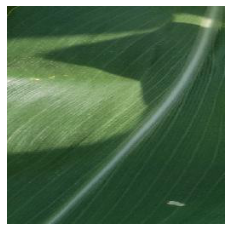

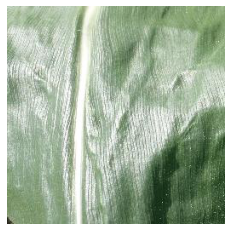

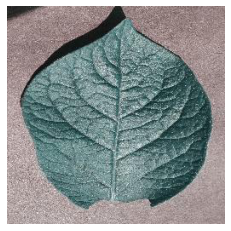

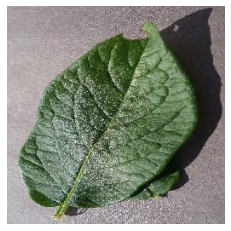

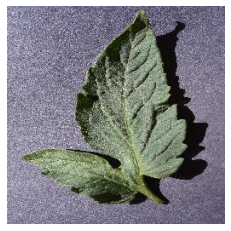

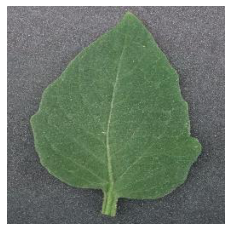

In [ ]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

Corn_img = [os.path.join(Corn_healthy, fname) 
                for fname in Corn_files[pic_index-2:pic_index]]
Potato_img = [os.path.join(Potato_healthy, fname) 
                for fname in Potato_files[pic_index-2:pic_index]]
Tomato_img = [os.path.join(Tomato_healthy, fname) 
                for fname in Tomato_files[pic_index-2:pic_index]]

for i, img_path in enumerate(Corn_img+Potato_img+Tomato_img):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
TRAINING_DIR = "/tmp/Bangkit's Peasant Dataset/train/"
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/tmp/Bangkit's Peasant Dataset/val/"
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(250, 250),
    class_mode='categorical',
    batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(250, 250),
    class_mode='categorical',
    batch_size=128
)

model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(250, 250, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(17, activation='softmax')
])


model.summary()

Found 31363 images belonging to 17 classes.
Found 7840 images belonging to 17 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 250, 250, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        36928     
___________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

Epoch 1/10
246/246 [==============================] - 437s 2s/step - loss: 2.2591 - accuracy: 0.3200 - val_loss: 1.1277 - val_accuracy: 0.6171
Epoch 2/10
246/246 [==============================] - 398s 2s/step - loss: 0.8659 - accuracy: 0.7114 - val_loss: 0.8781 - val_accuracy: 0.7351
Epoch 3/10
246/246 [==============================] - 398s 2s/step - loss: 0.5680 - accuracy: 0.8097 - val_loss: 1.0115 - val_accuracy: 0.7607
Epoch 4/10
246/246 [==============================] - 401s 2s/step - loss: 0.4396 - accuracy: 0.8535 - val_loss: 0.9976 - val_accuracy: 0.7852
Epoch 5/10
246/246 [==============================] - 397s 2s/step - loss: 0.3597 - accuracy: 0.8772 - val_loss: 0.3483 - val_accuracy: 0.8934
Epoch 6/10
246/246 [==============================] - 401s 2s/step - loss: 0.2982 - accuracy: 0.8978 - val_loss: 0.4255 - val_accuracy: 0.8825
Epoch 7/10
246/246 [==============================] - 400s 2s/step - loss: 0.2809 - accuracy: 0.9106 - val_loss: 0.7754 - val_accuracy: 0.8413

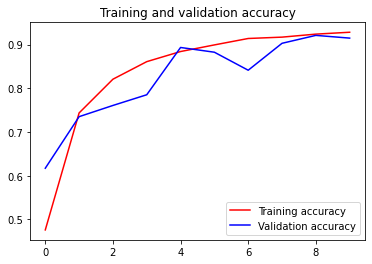

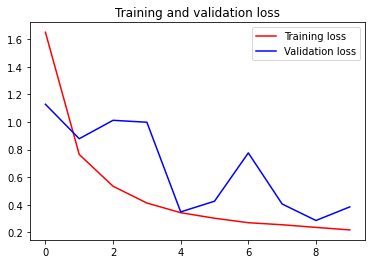

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving TomatoEarlyBlight1.JPG to TomatoEarlyBlight1.JPG


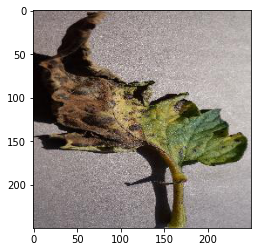

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 6.01%
Corn_(maize)___Common_rust_: 5.51%
Corn_(maize)___Northern_Leaf_Blight: 5.87%
Corn_(maize)___healthy: 7.25%
Potato___Early_blight: 5.76%
Potato___Late_blight: 6.28%
Potato___healthy: 5.11%
Tomato___Bacterial_spot: 6.14%
Tomato___Early_blight: 6.43%
Tomato___Late_blight: 4.67%
Tomato___Leaf_Mold: 6.13%
Tomato___Septoria_leaf_spot: 5.29%
Tomato___Spider_mites Two-spotted_spider_mite: 6.26%
Tomato___Target_Spot: 5.40%
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5.48%
Tomato___Tomato_mosaic_virus: 5.81%
Tomato___healthy: 6.59%


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

labels = train_generator.class_indices.keys()

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
mode = " " 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
import pathlib

tflite_model_file = pathlib.Path('/content/pdv1.tflite')
tflite_model_file.write_bytes(tflite_model)

5686368

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]